In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
mpl.rcParams['figure.facecolor'] = 'white'
colors = ['#4285f4', '#f4b400', '#0f9d58', '#db4437', '#1a237e',  '#737373']

In [26]:
subscription_prices = pd.read_json('subscription_prices.json')
subscription_prices.head()

,BASIC,PRO,MAX
2020,33,65,99
2021,43,75,109
2022,53,85,119


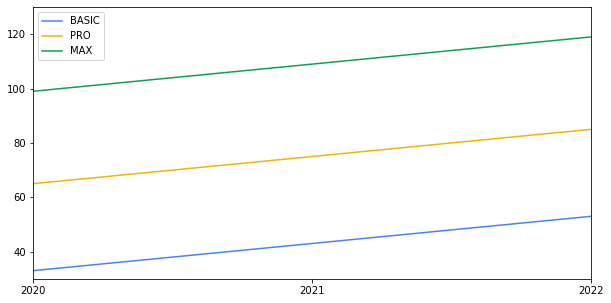

In [27]:
subscription_prices['BASIC'].plot(label='BASIC', color=colors[0], figsize=(10,5))
subscription_prices['PRO'].plot(label='PRO', color=colors[1])
subscription_prices['MAX'].plot(label='MAX', color=colors[2])
plt.xlim(2020, 2022)
plt.xticks([2020, 2021, 2022])
plt.ylim(30, 130)
plt.legend()
plt.show()


In [28]:
data = pd.read_csv('Final_ARC_Case.csv')
data.head()

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
3,3,REDUCTION,2022-02-01,BASIC,53,Female,25-34,Norway,facebook
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display


In [29]:
data['transaction_type'].value_counts()

initial      10366
UPGRADE       3006
REDUCTION     2539
CHURN         2195
Name: transaction_type, dtype: int64

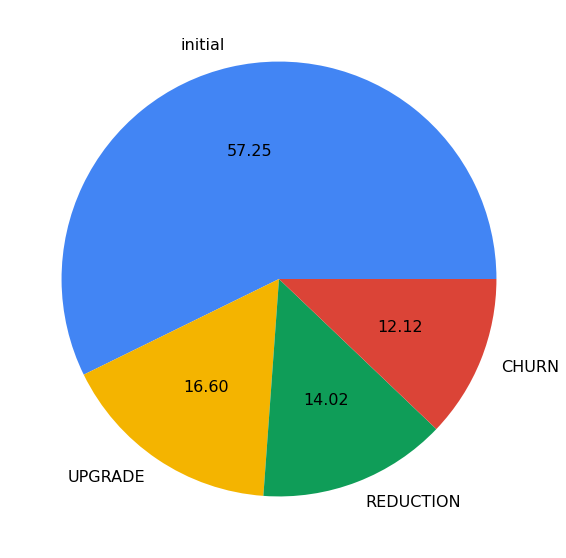

In [30]:
percentages = data['transaction_type'].value_counts(normalize=True)
ax = data['transaction_type'].value_counts().plot(kind = 'pie', autopct='%.2f', figsize=(10,10), fontsize=16, colors=colors)
ax.yaxis.set_visible(False)
plt.show() 

In [31]:
sorted_data = data.sort_values(['cust_id', 'transaction_date'], ascending=True)

In [32]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Get all rows where transaction type is 'inital' or 'CHURN'
initial_and_churn = data.loc[(data['transaction_type'] == 'initial') | (data['transaction_type'] == 'CHURN')]

join_on = ['cust_id', 'age_group', 'customer_country', 'referral_type', 'customer_gender']
joined = initial_and_churn.merge(initial_and_churn, how='left', on=join_on, suffixes=('_initial', '_churn'))

# Get information on customers that has quit their subscriptions 
churned = joined.loc[(joined['transaction_type_initial'] == 'initial') & (joined['transaction_type_churn'] == 'CHURN')]

churned.reset_index(drop=True, inplace=True)

# from this, we can see their initial subscription type, their inital price, how long they've been subscribed for 
# we can look at the most frequent countries and age groups, genders and referall types

days = churned['transaction_date_churn'] - churned['transaction_date_initial']

churned.insert(len(churned.columns), 'subscription_days', days)
churned

,cust_id,transaction_type_initial,transaction_date_initial,subscription_type_initial,subscription_price_initial,customer_gender,age_group,customer_country,referral_type,transaction_type_churn,transaction_date_churn,subscription_type_churn,subscription_price_churn,subscription_days
0,8,initial,2021-01-01,BASIC,43,Other,45-54,Sweden,facebook,CHURN,2021-04-01,BASIC,43,90 days
1,9,initial,2020-08-01,BASIC,33,Female,25-34,Sweden,facebook,CHURN,2021-03-01,BASIC,43,212 days
2,17,initial,2021-12-01,BASIC,43,Male,45-54,Denmark,Unknown,CHURN,2022-08-01,BASIC,53,243 days
3,22,initial,2022-06-01,BASIC,53,Female,25-34,Finland,Unknown,CHURN,2022-11-01,BASIC,53,153 days
4,26,initial,2021-02-01,BASIC,43,Female,35-44,Sweden,Paid Search,CHURN,2022-10-01,PRO,85,607 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,10328,initial,2021-10-01,BASIC,43,Male,45-54,Denmark,facebook,CHURN,2022-04-01,BASIC,53,182 days
2191,10340,initial,2020-05-01,PRO,65,Female,35-44,Sweden,TV,CHURN,2021-06-01,PRO,75,396 days
2192,10355,initial,2020-05-01,BASIC,33,Female,35-44,Finland,TV,CHURN,2020-11-01,BASIC,33,184 days
2193,10363,initial,2020-10-01,PRO,65,Female,18-24,Finland,Google Ads,CHURN,2022-02-01,BASIC,53,488 days


In [33]:
churned['customer_gender'].value_counts()

Female    1113
Male       937
Other      145
Name: customer_gender, dtype: int64

In [34]:
churned_ids = churned['cust_id']

not_churned = sorted_data[~sorted_data['cust_id'].isin(churned_ids.to_list())]

In [35]:
today = datetime.now().date()

inital = not_churned.loc[not_churned['transaction_type']=='initial']

inital_dates = inital['transaction_date']

inital_dates = pd.to_datetime(inital_dates).dt.date

subscription_lengths = today - inital_dates
not_churned.insert(len(not_churned.columns), 'subscription_days', subscription_lengths)

join_on = ['cust_id', 'age_group', 'customer_country', 'referral_type', 'customer_gender']
joined = not_churned.merge(not_churned, how='left', on=join_on, suffixes=('_initial', '_latest'))

active_subscribers = joined.loc[((joined['transaction_type_initial'] == 'initial') & (joined['transaction_type_initial'] != joined['transaction_type_latest']))]
active_subscribers = active_subscribers.drop(columns='subscription_days_latest')
active_subscribers.rename(columns={'subscription_days_initial':'subscription_days'}, inplace=True)
active_subscribers.reset_index(drop=True, inplace=True)

active_subscribers.head()

,cust_id,transaction_type_initial,transaction_date_initial,subscription_type_initial,subscription_price_initial,customer_gender,age_group,customer_country,referral_type,subscription_days,transaction_type_latest,transaction_date_latest,subscription_type_latest,subscription_price_latest
0,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook,910 days,REDUCTION,2022-02-01,BASIC,53
1,11,initial,2020-05-01,BASIC,33,Female,45-54,Norway,Organic Search,1063 days,UPGRADE,2022-01-01,MAX,119
2,12,initial,2020-09-01,BASIC,33,Male,25-34,Finland,facebook,940 days,UPGRADE,2022-09-01,PRO,85
3,14,initial,2020-03-01,BASIC,33,Female,35-44,Norway,Google Ads,1124 days,UPGRADE,2020-07-01,PRO,65
4,16,initial,2020-12-01,PRO,65,Female,18-24,Norway,Organic Search,849 days,UPGRADE,2022-11-01,MAX,119


In [36]:
active_subscribers.describe()

,cust_id,subscription_price_initial,subscription_days,subscription_price_latest
count,4538.000000,4538.000000,4538,4538.000000
mean,5194.388717,73.002204,785 days 18:41:05.579550464,81.647422
std,3001.598508,25.659045,255 days 23:21:06.255540532,29.160126
min,3.000000,33.000000,180 days 00:00:00,33.000000
25%,2568.500000,53.000000,575 days 00:00:00,53.000000
50%,5213.500000,75.000000,787 days 00:00:00,85.000000
75%,7800.500000,99.000000,1002 days 00:00:00,109.000000
max,10365.000000,119.000000,1184 days 00:00:00,119.000000


In [37]:
churned.describe()

,cust_id,subscription_price_initial,subscription_price_churn,subscription_days
count,2195.000000,2195.000000,2195.000000,2195
mean,5121.442825,57.161276,70.318451,331 days 07:30:41.822323464
std,2954.304953,21.747231,27.265570,194 days 16:36:42.061584110
min,8.000000,33.000000,33.000000,89 days 00:00:00
25%,2617.500000,33.000000,43.000000,183 days 00:00:00
50%,4995.000000,65.000000,65.000000,304 days 00:00:00
75%,7698.000000,65.000000,85.000000,396 days 00:00:00
max,10366.000000,119.000000,119.000000,1035 days 00:00:00


**Examining if there is a difference in the distribution of years that active customers vs customers who quit started their subscriptions:**

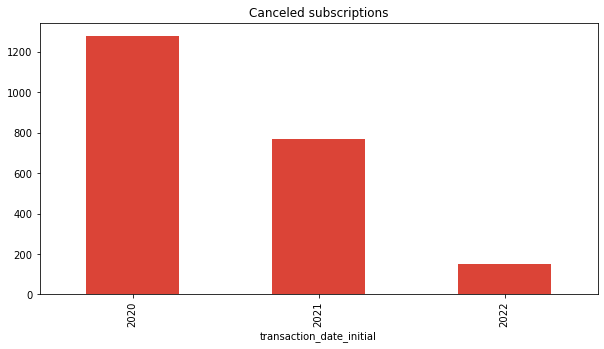

In [38]:
churned['transaction_date_initial'] = churned['transaction_date_initial'].astype("datetime64")

churned['transaction_date_initial'] .groupby(churned['transaction_date_initial'].dt.year).count().plot(kind="bar", color=colors[3], title='Canceled subscriptions', figsize=(10,5))
plt.show()

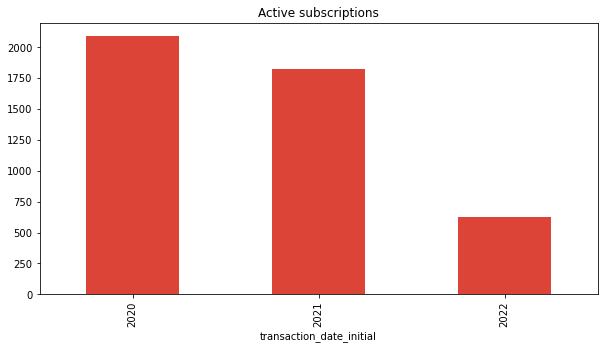

In [39]:
active_subscribers['transaction_date_initial'] = active_subscribers['transaction_date_initial'].astype("datetime64")

active_subscribers['transaction_date_initial'] .groupby(active_subscribers['transaction_date_initial'].dt.year).count().plot(kind="bar", color=colors[3], title='Active subscriptions', figsize=(10,5))

plt.show()

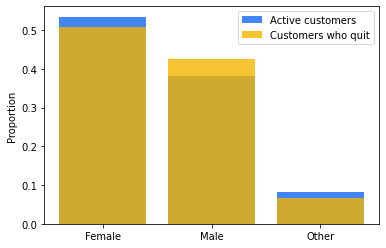

In [40]:
# Find the proportion of referral types in the subset of customers who have quit their subscriptions
churned_gender_counts = churned['customer_gender'].value_counts(normalize=True)

# Find the proportion of referral types in the subset of customers who have not quit their subscriptions
active_gender_counts = active_subscribers['customer_gender'].value_counts(normalize=True)

# Create a bar chart to compare the proportions
fig, ax = plt.subplots()
ax.bar(active_gender_counts.index, active_gender_counts.values, label='Active customers', alpha=1, color=colors[0])
ax.bar(churned_gender_counts.index, churned_gender_counts.values, label='Customers who quit', alpha=0.8, color=colors[1])
ax.set_ylabel('Proportion')
ax.legend()
plt.show()

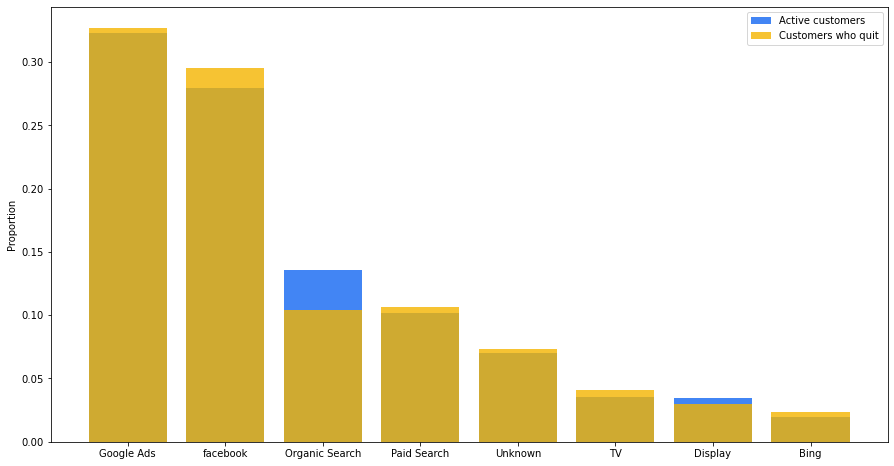

In [41]:
# Calculate the proportion of referral types in churned
churned_gender_counts = churned['referral_type'].value_counts(normalize=True)

# Calculate the proportion of referral types in the subset of customers who have not quit their subscriptions
active_gender_counts = active_subscribers['referral_type'].value_counts(normalize=True)

# Create a bar chart to compare the proportions
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(active_gender_counts.index, active_gender_counts.values, label='Active customers', alpha=1, color=colors[0])
ax.bar(churned_gender_counts.index, churned_gender_counts.values, label='Customers who quit', alpha=0.8, color=colors[1])
ax.set_ylabel('Proportion')
ax.legend()
plt.show()

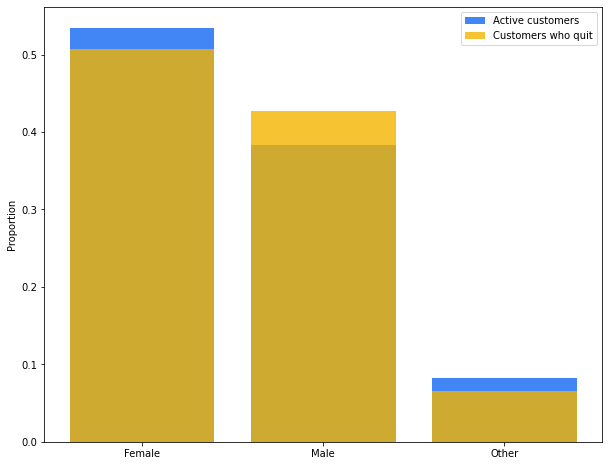

In [42]:
# Calculate the proportion of genders in churned
churned_country_counts = churned['customer_gender'].value_counts(normalize=True)

# Calculate the proportion of genders in the subset of customers who have not quit their subscriptions
active_country_counts = active_subscribers['customer_gender'].value_counts(normalize=True)

# Create a bar chart to compare the proportions
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(active_country_counts.index, active_country_counts.values, label='Active customers', alpha=1, color=colors[0])
ax.bar(churned_country_counts.index, churned_country_counts.values, label='Customers who quit', alpha=0.8, color=colors[1])
ax.set_ylabel('Proportion')
ax.legend()
plt.show()

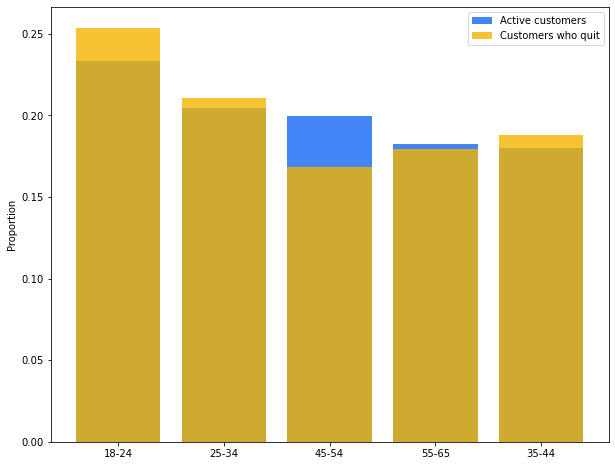

In [43]:
# Find the proportion of ages in the subset of customers who have quit their subscriptions
churned_country_counts = churned['age_group'].value_counts(normalize=True)

# Find the proportion of ages in the subset of customers who have not quit their subscriptions
active_country_counts = active_subscribers['age_group'].value_counts(normalize=True)

# Create a bar chart to compare the proportions
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(active_country_counts.index, active_country_counts.values, label='Active customers', alpha=1, color=colors[0])
ax.bar(churned_country_counts.index, churned_country_counts.values, label='Customers who quit', alpha=0.8, color=colors[1])
ax.set_ylabel('Proportion')
ax.legend()
plt.show()

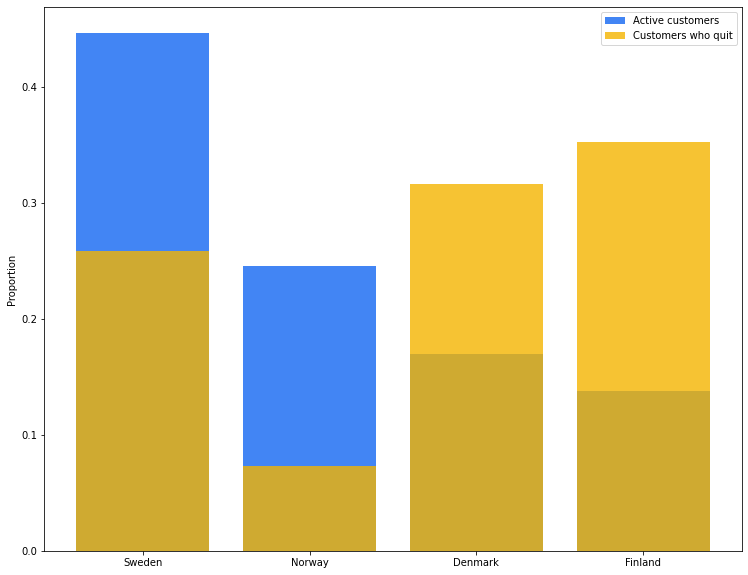

In [44]:
# Find the proportion of countries in the subset of customers who have quit their subscriptions
churned_country_counts = churned['customer_country'].value_counts(normalize=True)

# Find the proportion of countries in the subset of customers who have not quit their subscriptions
active_country_counts = active_subscribers['customer_country'].value_counts(normalize=True)

# Create a bar chart to compare the proportions
fig, ax = plt.subplots(figsize=(12.5,10))
ax.bar(active_country_counts.index, active_country_counts.values, label='Active customers', alpha=1, color=colors[0])
ax.bar(churned_country_counts.index, churned_country_counts.values, label='Customers who quit', alpha=0.8, color=colors[1])
ax.set_ylabel('Proportion')
ax.legend()
plt.show()

**In the plot above we see something interesting. In Denmark and Finland there are a lot more people who have not continued to subscribe.**

**Below, I now look at Denmark only. I see that the inital subscription type of the customers who chose to quite their subscription is much often BASIC than the customers that are still active.**

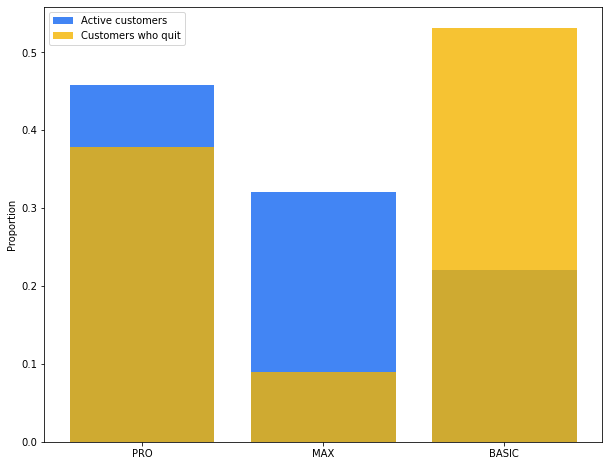

In [45]:
churned_denmark = churned.loc[churned['customer_country']=='Denmark']

churned_counts = churned_denmark['subscription_type_initial'].value_counts(normalize=True)

active_denmark = active_subscribers.loc[active_subscribers['customer_country']=='Denmark']
active_counts = active_denmark['subscription_type_initial'].value_counts(normalize=True)

# Create a bar chart to compare the proportions
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(active_counts.index, active_counts.values, label='Active customers', alpha=1, color=colors[0])
ax.bar(churned_counts.index, churned_counts.values, label='Customers who quit', alpha=0.8, color=colors[1])
ax.set_ylabel('Proportion')
ax.legend()
plt.show()

In [46]:
churned.loc[churned['customer_country']=='Denmark'].describe(include=object)

,transaction_type_initial,subscription_type_initial,customer_gender,age_group,customer_country,referral_type,transaction_type_churn,subscription_type_churn
count,694,694,694,694,694,694,694,694
unique,1,3,3,5,1,8,1,3
top,initial,BASIC,Female,18-24,Denmark,Google Ads,CHURN,BASIC
freq,694,369,375,189,694,228,694,328


In [47]:
active_subscribers.loc[active_subscribers['customer_country']=='Denmark'].describe(include=object)

,transaction_type_initial,subscription_type_initial,customer_gender,age_group,customer_country,referral_type,transaction_type_latest,transaction_date_latest,subscription_type_latest
count,770,770,770,770,770,770,770,770,770
unique,1,3,3,5,1,8,2,32,3
top,initial,PRO,Female,18-24,Denmark,Google Ads,REDUCTION,2022-11-01,BASIC
freq,770,353,397,181,770,256,443,67,312


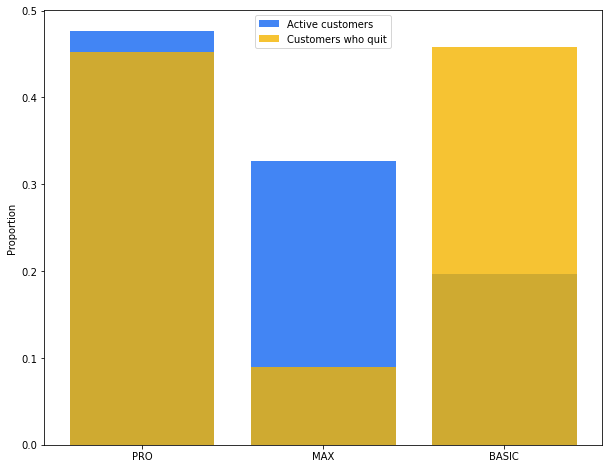

In [48]:
churned_finland = churned.loc[churned['customer_country']=='Finland']
churned_counts = churned_finland['subscription_type_initial'].value_counts(normalize=True)

active_finland = active_subscribers.loc[active_subscribers['customer_country']=='Finland']
active_counts = active_finland['subscription_type_initial'].value_counts(normalize=True)

# Create a bar chart to compare the proportions
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(active_counts.index, active_counts.values, label='Active customers', alpha=1, color=colors[0])
ax.bar(churned_counts.index, churned_counts.values, label='Customers who quit', alpha=0.8, color=colors[1])
ax.set_ylabel('Proportion')
ax.legend()
plt.show()
